"""
1. 시각적으로 표현할 분석 소주제 5개 이상 선정
2. 전처리(결측/이상/중복) 모두 처리 진행
    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인
3. 주제별 시각화 그래프 2개 이상
---------------------------------------------------
4. 주제별 분석내용 작성 : 개인별로 작성
5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일
    - 제출 형식 : 모두 압축해서 : 본인이름.zip
    - 제출 위치 : 구글드라이브 > 3_산출물 > 1_심평원분석
    
6. 문제해결 : 조별로 스터디 하면서 해결
"""

# EDA

##### 20_명세서일반내역 데이터셋 탐색적분석 결과
##### 연령별로 보험본인부담금에 유의미한 차이여부 분석 필요성 발생
##### x= 연령구간, y= 수술횟수 으로 설정
##### x <- 수진자연령을 구간별로 조건을 달리해 컬럼생성
##### y <- 수술여부를 정제 

# 데이터 정제

### 데이터 불러오기

In [2]:
sheet_list = ["20table_명세서일반내역",
                  "30table_진료내역",
                  "40table_상병",
                  "53table_처방전상세내역"]

In [4]:
import pandas as pd
for i in range (len(sheet_list)):
    file_path = './files_new2/df_kor_{}.xlsx'.format(sheet_list[i])
    globals()['df{}'.format(i)] = pd.read_excel(file_path, index_col=0)

In [22]:
df0_filter = df0[['수진자연령','수술여부']]

### X : 연령별 구간분류

In [24]:
year_list = ["1대", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대"]

# 연령대 필터링 범위 계산에 사용

df_9under = df0_filter[df0_filter['수진자연령']<=9]
df_9under = df_9under.reset_index(drop=True)
df_9under['연령대'] = '9세이하'
df_9under



,수진자연령,수술여부,연령대
0,3,0,9세이하
1,6,0,9세이하
2,3,0,9세이하
3,6,0,9세이하
4,6,0,9세이하
...,...,...,...
664,5,0,9세이하
665,6,0,9세이하
666,3,0,9세이하
667,9,0,9세이하


In [25]:
df_10 = df0_filter[(df0_filter['수진자연령']>=10) & \
                     (df0_filter['수진자연령']<=19)]
df_10 = df_10.reset_index(drop=True)
df_10['연령대'] = '10대'
df_10

,수진자연령,수술여부,연령대
0,14,0,10대
1,19,0,10대
2,15,0,10대
3,14,0,10대
4,14,0,10대
...,...,...,...
394,19,0,10대
395,19,0,10대
396,19,0,10대
397,17,0,10대


In [27]:
df_20 = df0_filter[(df0_filter['수진자연령']>=20) & \
                     (df0_filter['수진자연령']<=29)]
df_20 = df_20.reset_index(drop=True)
df_20['연령대'] = '20대'
df_20

,수진자연령,수술여부,연령대
0,20,0,20대
1,29,0,20대
2,20,0,20대
3,20,0,20대
4,26,0,20대
...,...,...,...
284,28,0,20대
285,27,0,20대
286,20,0,20대
287,25,0,20대


In [29]:
df_30 = df0_filter[(df0_filter['수진자연령']>=30) & \
                     (df0_filter['수진자연령']<=39)]
df_30 = df_30.reset_index(drop=True)
df_30['연령대'] = '30대'
df_30

,수진자연령,수술여부,연령대
0,39,0,30대
1,35,0,30대
2,32,0,30대
3,35,0,30대
4,33,0,30대
...,...,...,...
437,33,0,30대
438,39,0,30대
439,36,0,30대
440,33,0,30대


In [30]:
df_40 = df0_filter[(df0_filter['수진자연령']>=40) & \
                     (df0_filter['수진자연령']<=49)]
df_40 = df_40.reset_index(drop=True)
df_40['연령대'] = '40대'
df_40

,수진자연령,수술여부,연령대
0,46,0,40대
1,40,0,40대
2,45,9,40대
3,44,0,40대
4,42,0,40대
...,...,...,...
638,48,0,40대
639,41,0,40대
640,45,0,40대
641,47,0,40대


In [31]:
df_50 = df0_filter[(df0_filter['수진자연령']>=50) & \
                     (df0_filter['수진자연령']<=59)]
df_50 = df_50.reset_index(drop=True)
df_50['연령대'] = '50대'
df_50

,수진자연령,수술여부,연령대
0,52,0,50대
1,50,0,50대
2,53,0,50대
3,58,0,50대
4,57,0,50대
...,...,...,...
871,51,0,50대
872,51,0,50대
873,52,0,50대
874,57,0,50대


In [33]:
df_60 = df0_filter[(df0_filter['수진자연령']>=60) & \
                     (df0_filter['수진자연령']<=69)]
df_60 = df_60.reset_index(drop=True)
df_60['연령대'] = '60대'
df_60

,수진자연령,수술여부,연령대
0,62,0,60대
1,68,0,60대
2,61,0,60대
3,61,0,60대
4,69,0,60대
...,...,...,...
1153,61,0,60대
1154,61,0,60대
1155,67,0,60대
1156,62,0,60대


In [34]:
df_70 = df0_filter[(df0_filter['수진자연령']>=70) & \
                     (df0_filter['수진자연령']<=79)]
df_70 = df_70.reset_index(drop=True)
df_70['연령대'] = '70대'
df_70

,수진자연령,수술여부,연령대
0,74,0,70대
1,76,0,70대
2,75,0,70대
3,71,0,70대
4,77,0,70대
...,...,...,...
1018,71,0,70대
1019,76,0,70대
1020,71,0,70대
1021,71,0,70대


In [36]:
df_80 = df0_filter[(df0_filter['수진자연령']>=80) & \
                     (df0_filter['수진자연령']<=89)]
df_80 = df_80.reset_index(drop=True)
df_80['연령대'] = '80대'
df_80

,수진자연령,수술여부,연령대
0,81,0,80대
1,81,0,80대
2,81,0,80대
3,83,0,80대
4,81,0,80대
...,...,...,...
117,84,0,80대
118,81,0,80대
119,82,0,80대
120,81,0,80대


In [35]:
df_90 = df0_filter[(df0_filter['수진자연령']>=90) & \
                     (df0_filter['수진자연령']<=99)]
df_90 = df_90.reset_index(drop=True)
df_90['연령대'] = '90대'
df_90

,수진자연령,수술여부,연령대
0,94,0,90대
1,94,0,90대
2,93,0,90대
3,93,0,90대
4,94,0,90대
5,94,0,90대
6,94,0,90대
7,94,0,90대
8,94,0,90대
9,94,0,90대


In [72]:
# 모든 연령대를 1개의 데이터프레임으로 통합하기
df_age_any = pd.DataFrame()
df_age_any = pd.concat([df_9under, df_10, df_20, df_30, df_40, df_50, df_60, df_70, df_80, df_90], ignore_index=True)
df_age_any

,수진자연령,수술여부,연령대
0,3,0,9세이하
1,6,0,9세이하
2,3,0,9세이하
3,6,0,9세이하
4,6,0,9세이하
...,...,...,...
5626,94,0,90대
5627,94,0,90대
5628,94,0,90대
5629,94,0,90대


### Y : 연령별 수술횟수

In [73]:
df_age_any.to_csv('./files_new2/df_age_any.csv', index=False)

In [74]:
df_age_any = df_age_any[['수술여부', '연령대']]

In [75]:
df_age_any_group = df_age_any.groupby('연령대').sum()

In [76]:
df_age_any_group.reset_index()

,연령대,수술여부
0,10대,81
1,20대,81
2,30대,72
3,40대,162
4,50대,189
5,60대,189
6,70대,135
7,80대,27
8,90대,0
9,9세이하,117


In [77]:
df_age_any_group['수술여부'] = df_age_any_group['수술여부']/9

In [78]:
df_age_any_group

,수술여부
연령대,
10대,9.0
20대,9.0
30대,8.0
40대,18.0
50대,21.0
60대,21.0
70대,15.0
80대,3.0
90대,0.0


# 시각화

In [82]:
import matplotlib.pyplot as plt

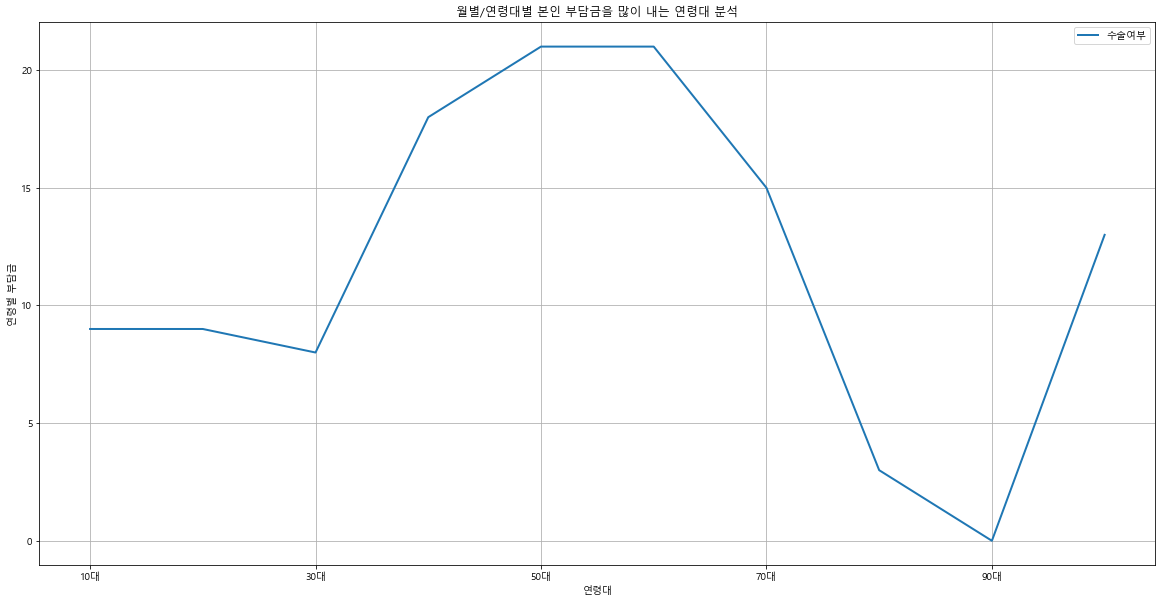

In [84]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams["figure.figsize"] = (20,10)
# 선의 두께 지정
plt.rcParams["lines.linewidth"] = 2
# 폰트 지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
df_age_any_group.plot()

plt.title("연령별 수술횟수")
plt.ylabel("수술횟수")


# 범례 위치 변경하기
plt.legend(loc="upper right")

# 그래프 내에 그리드 선 표시하기
plt.grid(True)

plt.show()

# 결론

##### 50,60대가 가장 많은 수술횟수를 기록
##### 90대가 가장 적은 수술횟수를 기록
- 거동이 힘들거나, 인구수 감소, 독거노인화 등으로 추정
- 다양한 추가적인 원인분석 필요